# <center> Matplotlib复杂作图 </center>

# 1 数据处理和可视化准备

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 2 旋风图 

## 2.1 加载数据

In [2]:
# 加载作图数据
people = pd.read_csv('./data/people.csv')
people.head()

,年龄分组1,年龄分组2,男性,女性
0,0-4,0-4,508,528
1,NaN,5-9,803,820
2,10-14,10-14,657,940
3,NaN,15-19,86,848
4,20-24,20-24,927,554


In [3]:
# 提取分组数据
group1 =  people[people.年龄分组1.notnull()].copy()
group1.drop(columns=['年龄分组2'], inplace=True)
group1

,年龄分组1,男性,女性
0,0-4,508,528
2,10-14,657,940
4,20-24,927,554
6,30-34,971,591
8,40-44,809,949
10,50-54,940,650
12,60-64,949,645
14,70-74,579,977
16,80-84,623,958


## 2.2 使用乘法运算实现图形翻转 

- [双坐标轴和合并图例](https://www.cnblogs.com/Atanisi/p/8530693.html)

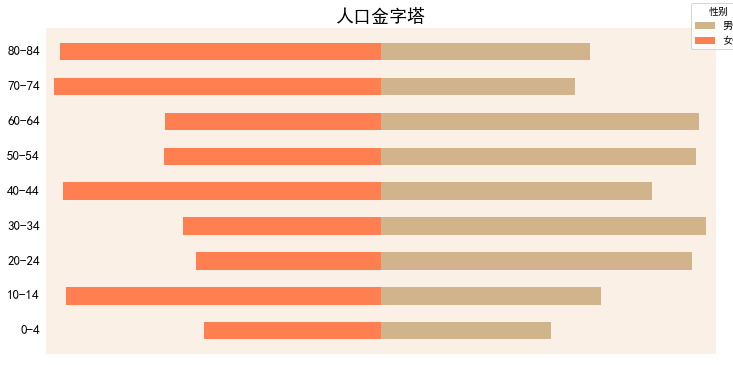

In [4]:
# 使用双坐标轴进行作图
plt.figure(figsize=(12, 6))
# 设置当前图片前景色
plt.gca().set_facecolor('linen')
# 设置图片标题
plt.title('人口金字塔', fontsize=18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

male = plt.barh(range(len(group1.index)), group1.男性, height=0.5, color='tan')
plt.xlim(-1000, 1000)
# 清除主坐标轴x轴刻度
plt.xticks([])
# 清楚主坐标轴y轴刻度
plt.yticks([])
# 添加y轴标签
for index, label in zip(range(len(group1.index)), group1.年龄分组1):
    plt.text(-1020, index, label, fontsize=13, horizontalalignment='right', verticalalignment='center')

# 双y轴
plt.twiny()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
# 将女性数据乘以负一实现数据翻转
female = plt.barh(range(len(group1.index)), group1.女性*(-1), height=0.5, color='coral')
plt.xlim(-1000, 1000)
# 关闭次坐标轴
plt.axis('off')
# 合并图例
plt.figlegend(handles=(male, female), labels=('男性', '女性'), loc='upper right', bbox_to_anchor=(0.87, 0.85), title='性别')
plt.savefig('people.png')
plt.show()

# 3 移动坐标轴

- [Matplotlib改变默认坐标轴位置](https://blog.csdn.net/sinat_34328764/article/details/80246139)
- [tick_params方法来设置刻度](https://blog.csdn.net/hsq1596753614/article/details/80915880)
- [坐标轴刻度方向设置](https://www.jianshu.com/p/9a541170316c)
- [坐标轴刻度反向](https://blog.csdn.net/yuejisuo1948/article/details/81023125)
- [matplotlib绘制带箭头x-y坐标轴图形](https://www.jianshu.com/p/af8a448d4d4f)

**通过移动边框来实现坐标轴的移动：**

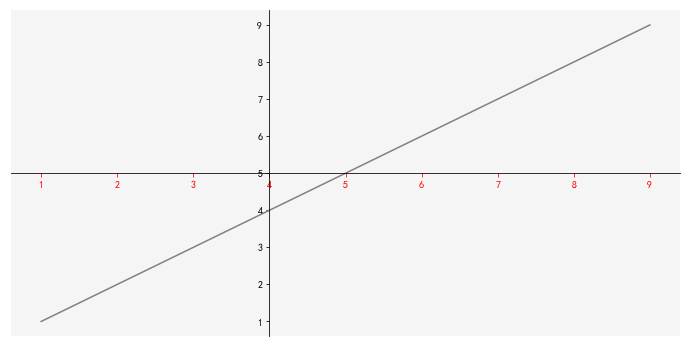

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), range(1, 10), color='gray')
# 获取当前坐标对象
ax = plt.gca()
# 设置前景色
ax.set_facecolor('whitesmoke')

# 设置刻度样式
ax.tick_params(axis='x', which='major', colors='red')
# 隐藏上边框和右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 将x轴绑定到下边框，y轴绑定到左边框
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# 移动x轴到y轴5的位置
ax.spines['bottom'].set_position(('data', 5))
# 移动y轴到x轴4的位置
ax.spines['left'].set_position(('data', 4))


# 4 标靶图

## 4.1 加载数据

In [6]:
# 加载数据
target = pd.read_csv('./data/target.csv')
target

,姓名,业绩,目标,一般,良好,优秀,完成率,基准
0,刘小华,1275,1200,60%,20%,20%,106%,90%
1,王小明,1753,1500,60%,20%,20%,117%,85%
2,于小飞,756,1100,60%,20%,20%,69%,90%
3,方群,684,980,60%,20%,20%,70%,85%
4,邓健,1230,1050,60%,20%,20%,117%,90%


In [7]:
# 定义一个将百分比字符串转换为百分比数值的函数
def converts(s):
    s_float = s.str.strip('%').astype(np.float)/100
    return s_float

## 4.2 使用误差线来画标靶图

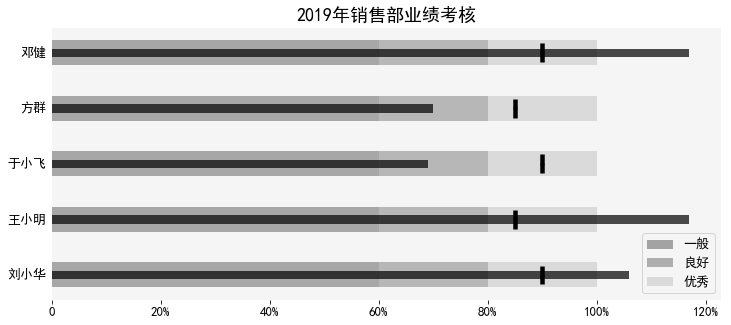

In [8]:
# 使用误差线来完成标靶图的制作
plt.figure(figsize=(12, 5))
plt.gca().set_facecolor('whitesmoke')
plt.title('2019年销售部业绩考核', fontsize=18)

# 良好列数据准备
data_well = (converts(target['一般'])+converts(target['良好'])).values
# 优秀列数据准备
data_excellent = (converts(target['一般'])+converts(target['良好'])+converts(target['优秀'])).values

# 画一般列的水平柱形图
plt.barh(target.index, converts(target['一般']).values, height=0.45, color='gray', alpha=0.7, label='一般')
# 画良好列的水平柱形图
plt.barh(target.index, data_well, height=0.45, color='grey', alpha=0.6, label='良好')
# 画优秀列的水平柱形图
plt.barh(target.index, data_excellent, height=0.45, color='silver', alpha=0.5, label='优秀')
# 画完成率列的水平柱形图
plt.barh(target.index, converts(target['完成率']).values, height=0.15, color='black', alpha=0.7)
# 画y轴的误差线
plt.errorbar(converts(target['基准']).values, target.index, yerr=0.17, color='black', fmt='.', elinewidth=4.5, ecolor='black')

# x轴标签
plt.xticks(np.arange(0, 1.4, 0.2), ['0', '20%', '40%', '60%', '80%', '100%', '120%'], fontsize=13)
# 去除y轴
plt.yticks([])
# y轴标签
for index, label in zip(target.index, target.姓名):
    plt.text(-0.01, index, label, fontsize=13, horizontalalignment='right', verticalalignment='center')
# 去除边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.legend(facecolor='whitesmoke', fontsize=13)
plt.savefig('target.png', dpi=700)
plt.show()

# 5 雷达图

## 5.1 极坐标详解 

- [Matplotlib极坐标详解](https://www.cnblogs.com/kallan/p/6738577.html)

## 5.2 使用极坐标画雷达图

- [极坐标绘制雷达图](https://blog.csdn.net/yuanxiang01/article/details/79566431)

In [9]:
# 加载数据
radar = pd.read_csv('./data/radar.csv')
radar

,能力,王强,张丽
0,自信心,86,65
1,个人愿景,56,91
2,学习力,79,48
3,适应性,52,85
4,灵活性,61,92
5,问题解决能力,95,88
6,交往能力,84,98
7,责任心,63,79


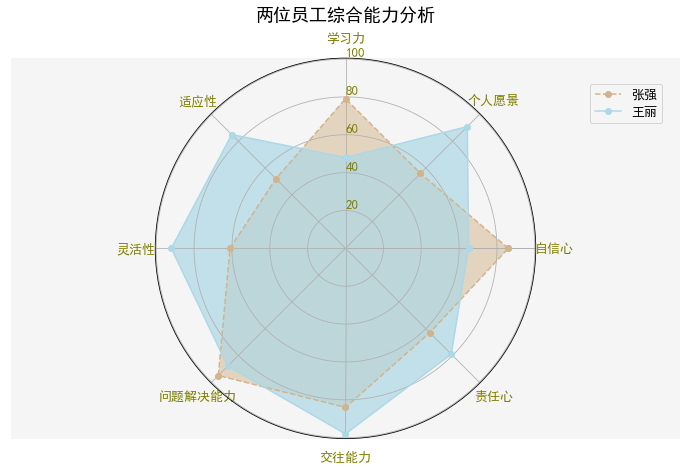

In [10]:
#  将系列数据进行闭环
data_wang = np.concatenate((radar.王强, [radar['王强'][0]]))
data_zhang = np.concatenate((radar.张丽, [radar['张丽'][0]]))
# 圆周长度为标签长度
circum = len(radar.index)
# 分割圆周
angles = np.linspace(0, 2*np.pi, circum, endpoint=False)
# 将圆周数据进行闭环
data_angles  = np.concatenate((angles, [angles[0]]))

# 设置画布
plt.figure(figsize=(12, 7))
# 设置标题
plt.title('两位员工综合能力分析', fontsize=18, y=1.08)
# 关闭坐标轴
plt.xticks([])
plt.yticks([])
# 消除边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# 设置前景色
ax.set_facecolor('whitesmoke')

# 画王强的极坐标系
plt.polar(data_angles, data_wang, '--o', c='tan', linewidth=1.5, label='张强')
# 区域填充
plt.fill(data_angles, data_wang, facecolor='tan', alpha=0.5)
# 画张丽的极坐标系
plt.polar(data_angles, data_zhang, '-o', c='lightblue', linewidth=1.5, label='王丽')
# 区域填充
plt.fill(data_angles, data_zhang, facecolor='lightblue', alpha=0.7)
# 添加标签
plt.thetagrids(data_angles*180/np.pi, radar.能力, fontsize=13, color='olive')
# 设置极轴字体和颜色
plt.yticks(fontsize=13, color='olive')
# 旋转极轴到正北方
ax_cor = plt.gca()
ax_cor.set_rlabel_position('90')
# 设置极径网格线显示
ax_cor.set_rgrids(np.arange(20, 120, 20))
# 设置极坐标的前景色
ax_cor.set_facecolor('whitesmoke')

plt.legend(bbox_to_anchor=(1.35, 0.95), fontsize=13, facecolor='whitesmoke')
plt.savefig('radar.png', dpi=600)
plt.show()

# 6 漏斗图

## 6.1 加载数据

In [11]:
# 加载数据
data_flow = pd.read_csv('./data/funnel.csv')
data_flow

,环节,人数,环节转化率,总体转化率
0,浏览商品,1000,100%,100%
1,放入购物车,500,50%,50%
2,生成订单,300,60%,30%
3,支付订单,200,67%,20%
4,完成交易,150,75%,15%


## 6.2 Matplotlib标注详解 

- [Matlibplot标注详解](https://blog.csdn.net/wizardforcel/article/details/54782628)
- [标题(title),标注(annotate),文字说明(text)](https://blog.csdn.net/helunqu2017/article/details/78659490)

## 6.3 使用辅助列来画漏斗图

和Excel一样，借助辅助列来画水平堆积柱形图，然后隐藏辅助列，来画漏斗图。

In [12]:
# 生成辅助列
data_flow['辅助列1'] = (data_flow.人数[0] - data_flow.人数) / 2
data_flow['辅助列2'] = data_flow['人数'] + data_flow['辅助列1']
data_flow.人数
data_flow

,环节,人数,环节转化率,总体转化率,辅助列1,辅助列2
0,浏览商品,1000,100%,100%,0.0,1000.0
1,放入购物车,500,50%,50%,250.0,750.0
2,生成订单,300,60%,30%,350.0,650.0
3,支付订单,200,67%,20%,400.0,600.0
4,完成交易,150,75%,15%,425.0,575.0


 **然后使用辅助列1和辅助列2来画水平堆积柱形图：**

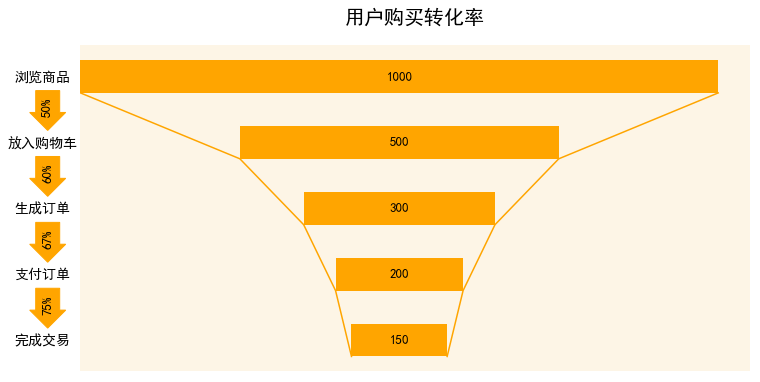

In [13]:
# 设置画布
plt.figure(figsize=(12, 6))
# 设置标题
plt.title('用户购买转化率', fontsize=20, y=1.05)
# 设置当前图形对象
ax = plt.gca()
# 设置前景色
ax.set_facecolor('oldlace')
# 去除边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# 翻转y轴
ax.invert_yaxis()
# 关闭坐标轴
plt.xticks([])
plt.yticks([])

# 画辅助列2的水平柱形图
plt.barh(data_flow.index, data_flow.辅助列2.values, color='orange', height=0.5)
# 画辅助列1的水平柱形图
plt.barh(data_flow.index, data_flow.辅助列1.values, color='oldlace', height=0.5)
# 添加数据标签
for index, label in zip(data_flow.index, data_flow.人数):
    plt.text(data_flow['人数'][0]/2, index, label, fontsize=13, horizontalalignment='center', verticalalignment='center')    
# 添加各阶段标签
for index, label in zip(data_flow.index, data_flow.环节):
    plt.text(-60, index, label, fontsize=14, horizontalalignment='center', verticalalignment='center')
# 添加左侧漏斗线
plt.plot(data_flow.辅助列1, data_flow.index.values+0.25, c='orange')
# 添加右侧漏斗线
plt.plot(data_flow.辅助列2, data_flow.index.values+0.25, c='orange')
# 添加转化率箭头
for index, label in zip(data_flow.index[:-1], data_flow.环节转化率[1:]):
    plt.text(-60, index+0.45, label, fontsize=13, bbox=dict(boxstyle='larrow, pad=0.5', color='orange'), rotation=90)

plt.savefig('funnel.png', dpi=600)
plt.show()

# 7 帕累托图

[帕累托图介绍](https://baijiahao.baidu.com/s?id=1630082047753510514&wfr=spider&for=pc)

## 7.1 加载数据

In [14]:
#  加载数据
score = pd.read_csv('./data/pareto.csv')
score.head()

,姓名,成绩
0,张三,95
1,李四,82
2,王五,90
3,赵六,86
4,钱七,84


**使用嵌套的where函数来添加成绩区间辅助列：**

In [15]:
# 使用嵌套where函数来添加辅助列标志
score['分组'] = np.where((score.成绩>=0) & (score.成绩<60), '0-60',
                        np.where((score.成绩>=60) & (score.成绩<70), '60-70',
                        np.where((score.成绩>=70) & (score.成绩<80), '70-80',
                        np.where((score.成绩>=80) & (score.成绩<90), '80-90', '90-100'))))
score.head()

,姓名,成绩,分组
0,张三,95,90-100
1,李四,82,80-90
2,王五,90,90-100
3,赵六,86,80-90
4,钱七,84,80-90


**统计各个分数段的学生数量：**

In [16]:
# 对分组列进行计数
score_group = pd.DataFrame(score.分组.value_counts())
score_group

,分组
80-90,6
70-80,5
90-100,4
60-70,2
0-60,1


**增加分组人数累计百分比列：**

In [17]:
score_group['累计百分比'] = score_group.分组.cumsum() / score_group.分组.sum()
score_group.reset_index(inplace=True)
score_group.rename(columns={'index': 'label'}, inplace=True)
score_group

,label,分组,累计百分比
0,80-90,6,0.333333
1,70-80,5,0.611111
2,90-100,4,0.833333
3,60-70,2,0.944444
4,0-60,1,1.000000


**在表的第一行增加一行辅助列：**
- [Pandas在第一行数据前插入一行数据](https://www.cnblogs.com/wkang/p/10115368.html)

In [18]:
# 新增辅助行
# score_group.loc[-1] = ['0', 0, 0]
# score_group.index = score_group.index + 1
# score_group.sort_index(inplace=True)
# score_group

## 7.2 使用双坐标轴来画帕累托图

**用帕累托图来分析学生的成绩**

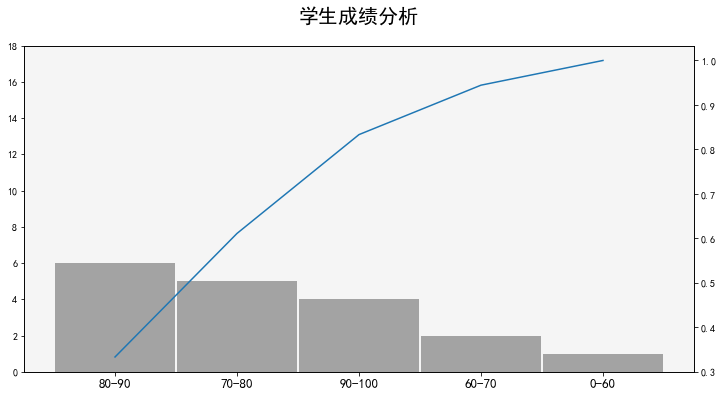

In [19]:
# 设置画布
plt.figure(figsize=(12, 6))
plt.title('学生成绩分析', fontsize=20, y=1.05)
# 设置当前图形对象
ax = plt.gca()
# 设置前景色
ax.set_facecolor('whitesmoke')

# 画分组列的柱形图
plt.bar(score_group.index, score_group.分组, width=0.99, color='grey', alpha=0.7)
# 设置x轴标签
plt.xticks(score_group.index, score_group.label, fontsize=13)
# 设置y轴刻度为18
plt.ylim(0, 18)
# 双x轴
plt.twinx()
# 画累计百分比列的折线图
plt.plot(score_group.index, score_group.累计百分比)

plt.show()